This study investigates the factors affecting income. There are two parts in this study. Part I presents the descriptive analysis and Part II presents inferential statistics. The purpose of descriptive analysis is to understand the data, its distribution and the presence of outliers. The purpose of inferential statistics is to explore factors affecting income and the economic significance of these effects.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

In [5]:
#  Reading the data into dataframe
df = pd.read_csv('sgdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


PART I: DESCRIPTIVE ANALYSIS        
This part first presents descriptive statistics (i.e. count, mean, median, std, Q1, Q3 min and max) for categorical and numerical variables investigated in this study. Next I present pie-chart for categorical variables to show the percentages of each category. Finally, I present histogram and box plot for numerical variables. I persent histogram to assess the distribution of a particular numerical variable and box plot to assess the presence of outliers on the tails of the distribution of that variable.

In [2]:
# Descriptive Statistics
df.describe()

,ID,Sex,Age,Income,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,35.909000,120954.419000,0.739000
std,5.774946e+02,0.498272,11.719402,38108.824679,0.812533
min,1.000000e+08,0.000000,18.000000,35832.000000,0.000000
25%,1.000005e+08,0.000000,27.000000,97663.250000,0.000000
50%,1.000010e+08,0.000000,33.000000,115548.500000,1.000000
75%,1.000015e+08,1.000000,42.000000,138072.250000,1.000000
max,1.000020e+08,1.000000,76.000000,309364.000000,2.000000


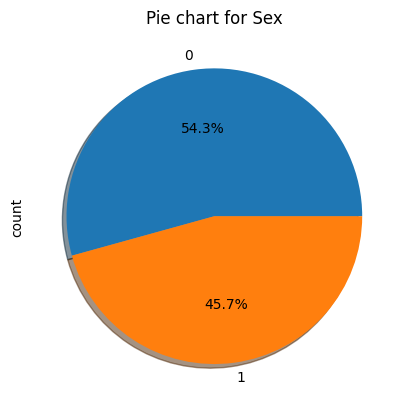

In [6]:
df['Sex'].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, title="Pie chart for Sex")
plt.show()

In [6]:
# Replacing the Marital Status categories to have only two categories
df['Marital status'] = df['Marital status'].replace({'single': 'Single', 'non-single (divorced / separated / married / widowed)': 'Non-Single'})
df['Marital status']

,Marital status
0,Single
1,Non-Single
2,Single
3,Single
4,Single
...,...
1995,Single
1996,Non-Single
1997,Single
1998,Non-Single


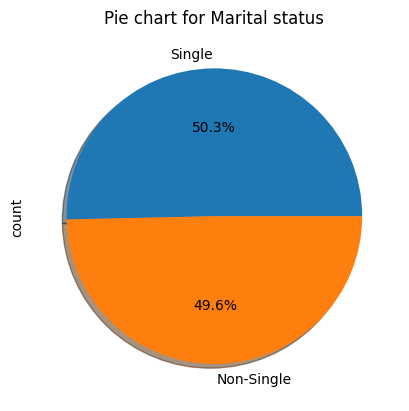

In [13]:
# Pie chart for Marital status
df['Marital status'].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, title="Pie chart for Marital status")
plt.show()

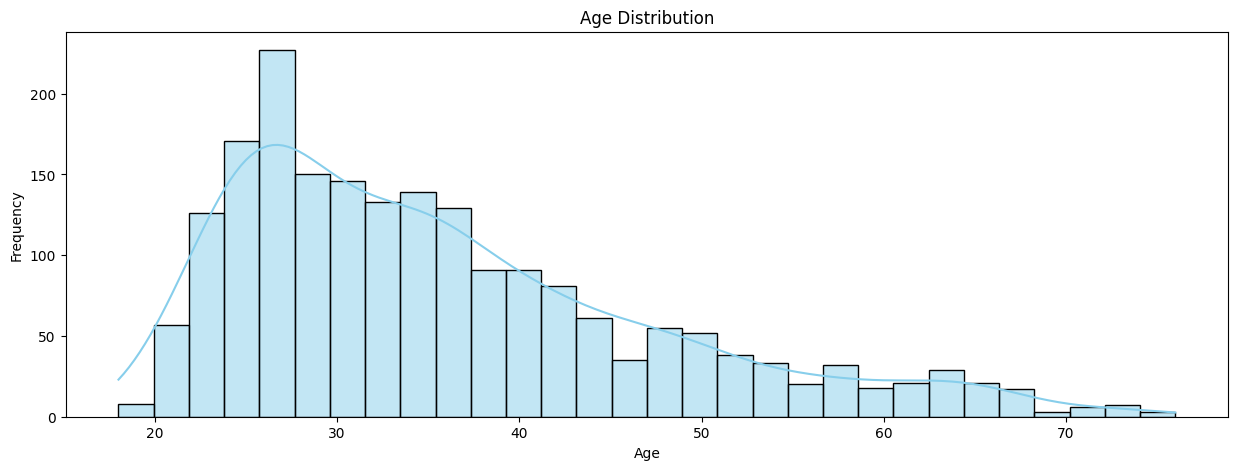

In [8]:
# Histogram of Age
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', ax=ax)
ax.set_title('Age Distribution')
ax.set_xlabel('Age') # Add an x-label for clarity
ax.set_ylabel('Frequency') # Add a y-label for clarity
plt.show()

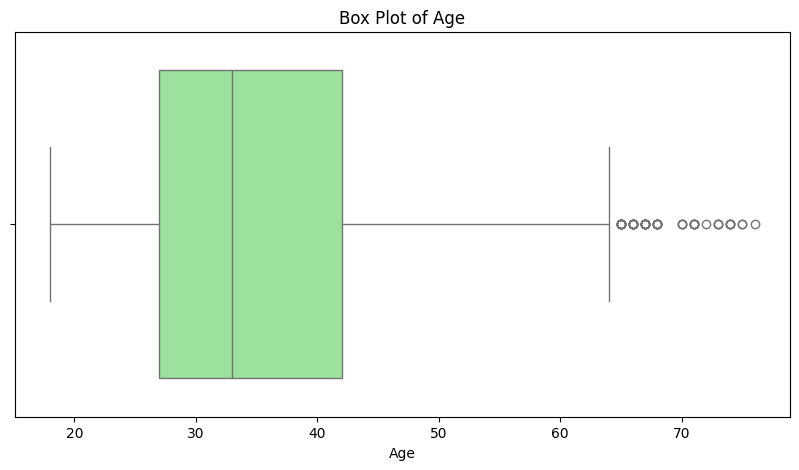

In [9]:
# Box plot for Age
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x=df['Age'], color='lightgreen', ax=ax)
ax.set_title('Box Plot of Age')
ax.set_xlabel('Age') # Add an x-label for clarity
plt.show()

The above histogram shows that the right tail of Age distribution is quite spread out. The box plot shows that there are outliers on the right tail of the distribution of Age especially for ages greater than 65.

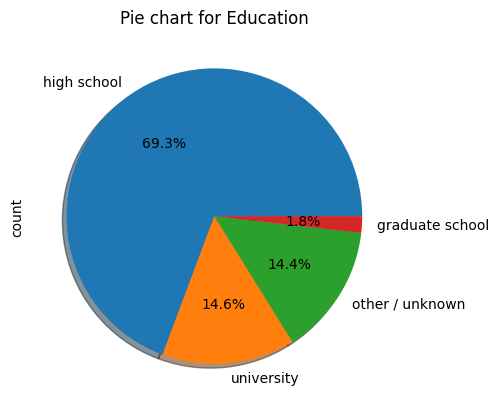

In [14]:
# Pie chart for Education
df['Education'].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, title="Pie chart for Education")
plt.show()

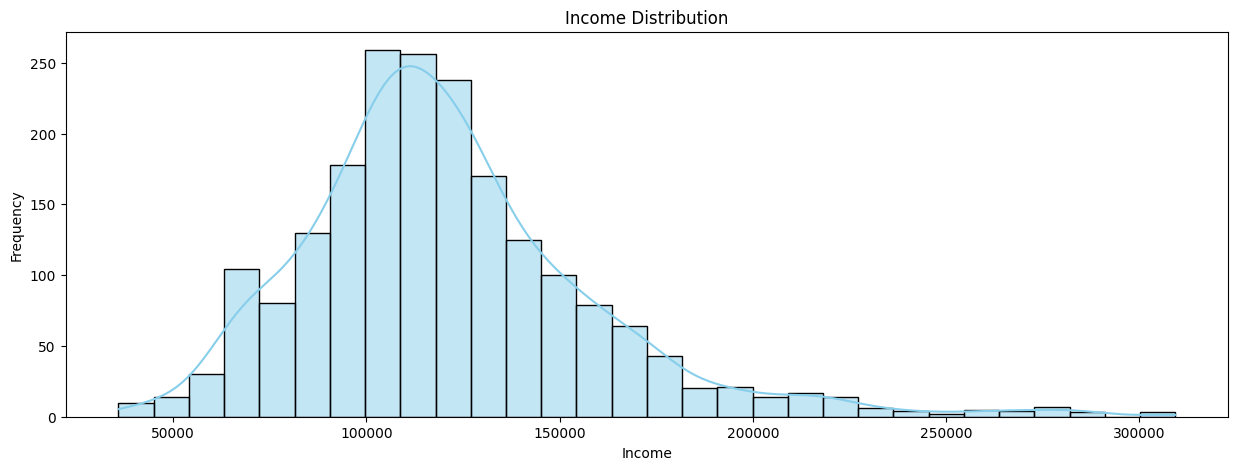

In [10]:
# Histogram of Income
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue', ax=ax)
ax.set_title('Income Distribution')
ax.set_xlabel('Income') # Add an x-label for clarity
ax.set_ylabel('Frequency') # Add a y-label for clarity
plt.show()

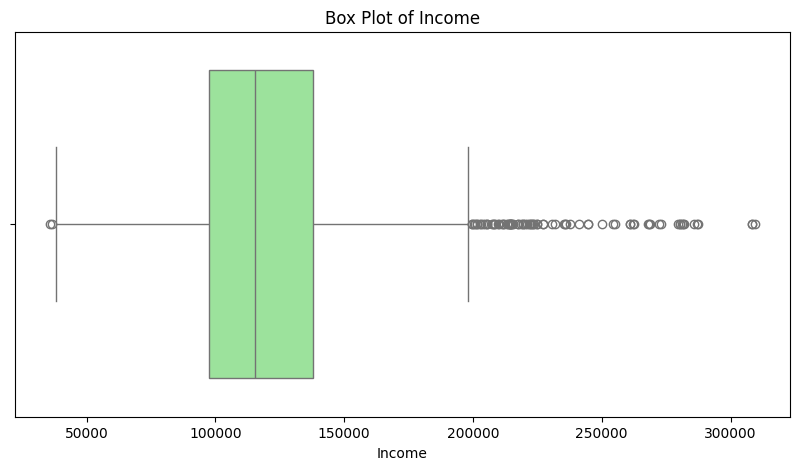

In [11]:
# Box plot for Income
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x=df['Income'], color='lightgreen', ax=ax)
ax.set_title('Box Plot of Income')
ax.set_xlabel('Income') # Add an x-label for clarity
plt.show()

The above histogram shows that the right tail of Income distribution is quite spread out especially for Income values greater than 200,000. The box plot shows that there are many outliers on the right tail of the distribution of Income particularly for Income values greater than 200,000.

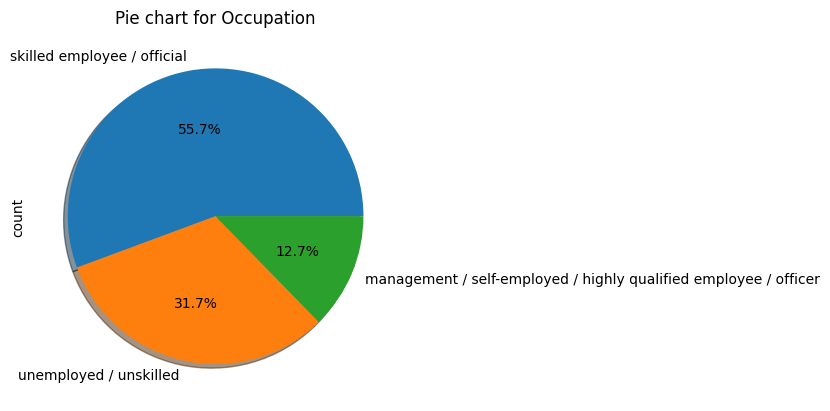

In [15]:
# Pie chart for Occupation
df['Occupation'].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, title="Pie chart for Occupation")
plt.show()

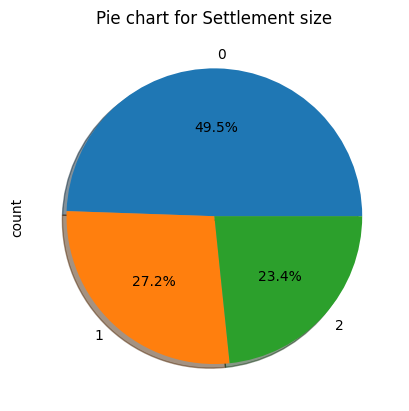

In [16]:
# Pie chart for Settlement size
df['Settlement size'].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, title="Pie chart for Settlement size")
plt.show()

PART II: INFERENTIAL STATISTICS:

In this section I explore the impacts of Sex, Education, Marital Status, Occupation, Settlement Size and Age on Income. For categorical variables (Sex, Education, Marital Status, Occupation, Settlement Size) I used bar chart by calculating the mean income for each category of a particular variable. For numerical variables (Age) I used regression. I then asses the economic significance of the impact of each variable on Income.

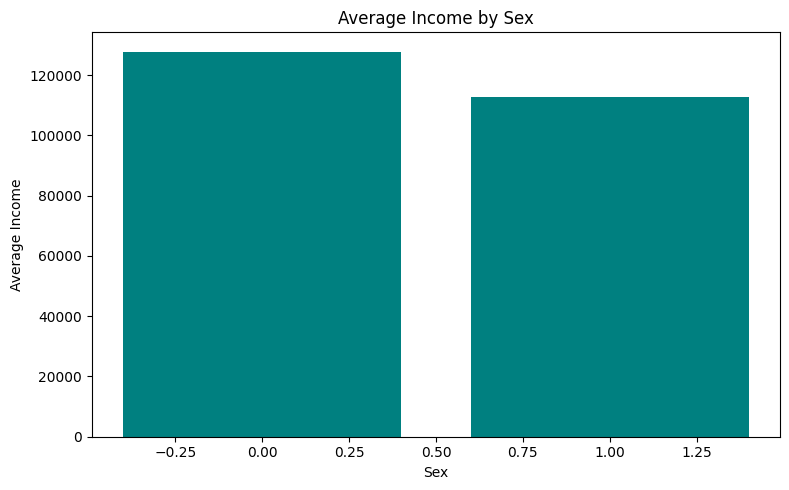

In [10]:
# Finding the average income by Sex categories
avg_income_by_sex = df.groupby('Sex')['Income'].mean().reset_index()

# Bar chart for average Income by Sex
plt.figure(figsize=(8, 5)) # Adjust figure size
plt.bar(avg_income_by_sex['Sex'], avg_income_by_sex['Income'], color='teal')
plt.title('Average Income by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Income')
plt.tight_layout() # Adjust layout
plt.show()

The above bar chart shows that males on average earn 127,775 greater than females 112,850.  The difference in income between males and females is 14,925. Thus, sex has economically significant effect on income.

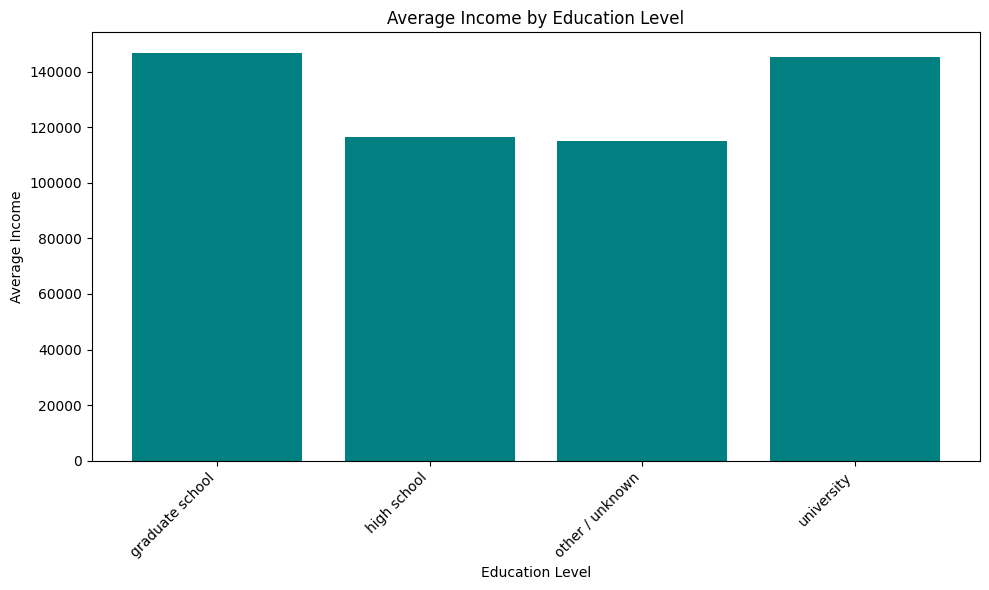

In [17]:
# Finding the average income by Education categories
avg_income_by_education = df.groupby('Education')['Income'].mean().reset_index()

# Bar chart for average Income by Education
plt.figure(figsize=(10, 6)) # Adjust figure size if needed
plt.bar(avg_income_by_education['Education'], avg_income_by_education['Income'], color='teal')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

The above bar chart shows that the highest Income is earned by people who completed graduate school (146,818) followed by people who completed university (145,406). The least income is earned by people in other/unknown group (115,068). The difference between graduate school group and other/unknown group is 31,750. Thus, education has economically significant effect on income.

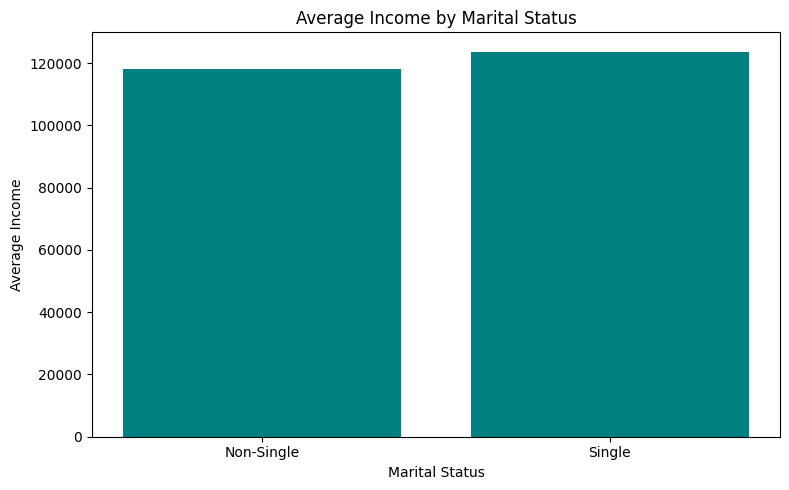

In [18]:
# Finding the average income by Marital status categories
avg_income_by_marital_status = df.groupby('Marital status')['Income'].mean().reset_index()

# Bar chart for average Income by Marital status
plt.figure(figsize=(8, 5)) # Adjust figure size
plt.bar(avg_income_by_marital_status['Marital status'], avg_income_by_marital_status['Income'], color='teal')
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.tight_layout() # Adjust layout
plt.show()

The above bar chart shows that single people earn higher income (123,736) than non-single people (118,133.). The difference between two groups is 5,603 suggesting that the difference is economically significant.

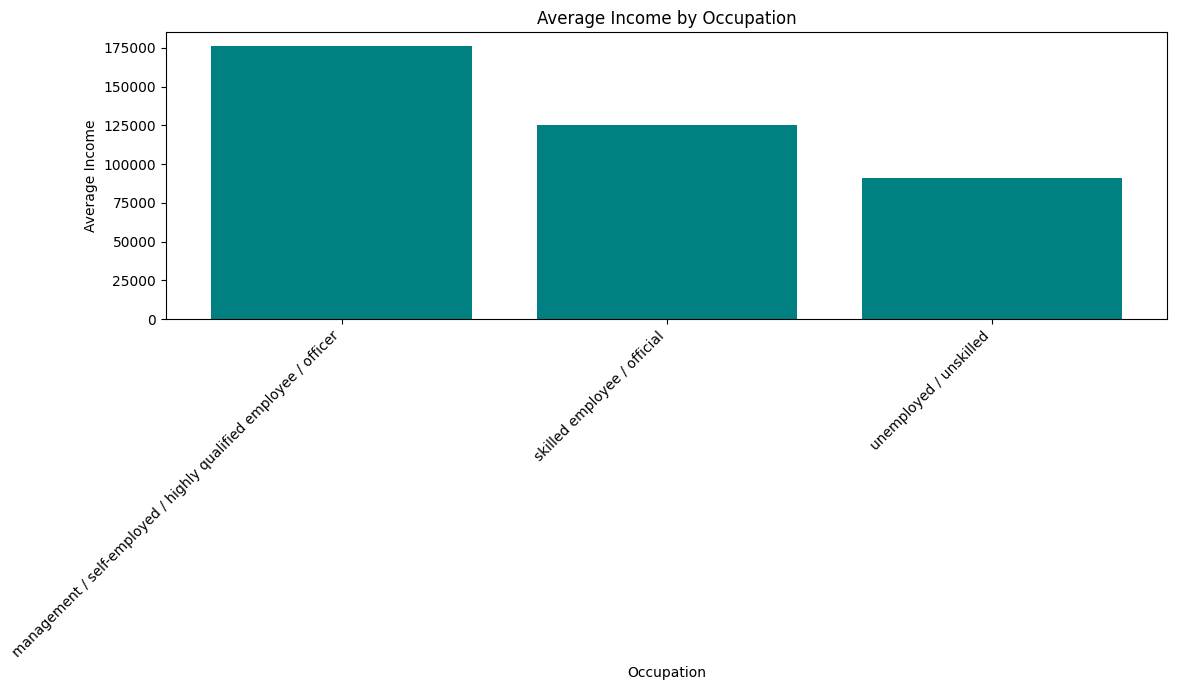

In [19]:
# Finding the average income by Occupation categories
avg_income_by_occupation = df.groupby('Occupation')['Income'].mean().reset_index()

# Bar chart for average Income by Occupation
plt.figure(figsize=(12, 7)) # Adjust figure size if needed
plt.bar(avg_income_by_occupation['Occupation'], avg_income_by_occupation['Income'], color='teal')
plt.title('Average Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

The above bar chart shows that people who have management / self-employed / highly qualified employee / officer jobs earn the highest income (176,203) while people unemployed / unskilled earn the least income (90,837). The difference between two groups is 85,366 suggesting that the management group has almost twice the income of unemployed group. Hence, occupation seems to have the strongest effect on income among the variables investigated in this study.

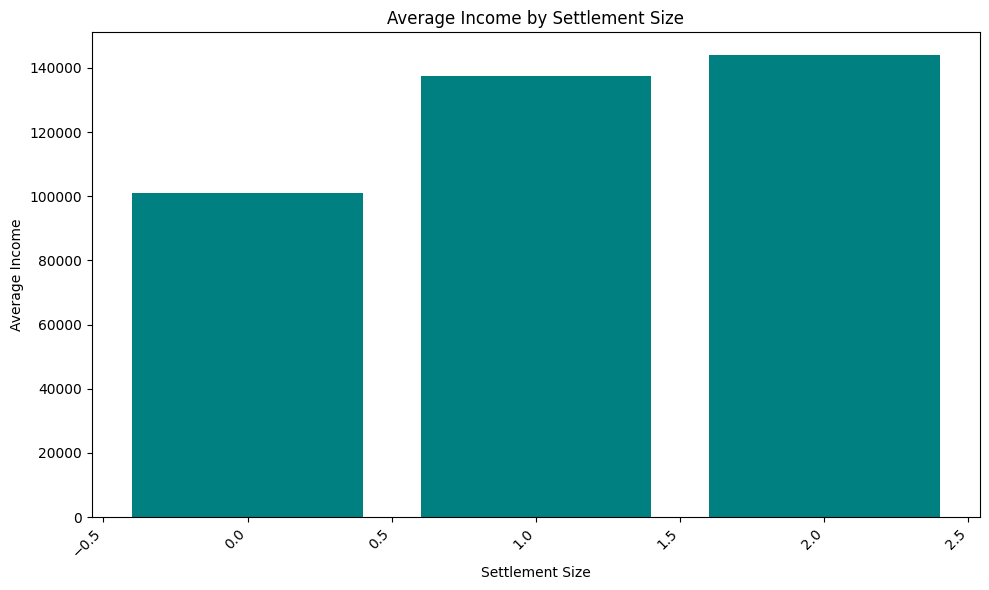

In [20]:
# Finding the average income by Settlement size categories
avg_income_by_settlement_size = df.groupby('Settlement size')['Income'].mean().reset_index()

# Bar chart for average Income by Settlement size
plt.figure(figsize=(10, 6)) # Adjust figure size if needed
plt.bar(avg_income_by_settlement_size['Settlement size'], avg_income_by_settlement_size['Income'], color='teal')
plt.title('Average Income by Settlement Size')
plt.xlabel('Settlement Size')
plt.ylabel('Average Income')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

The group with two settlement size earns the highest income (143,890) while the group with zero settlement size earns the least income (101,062). The difference between two groups is 42,828 suggesting that the impact of settlement size on income is economically significant.

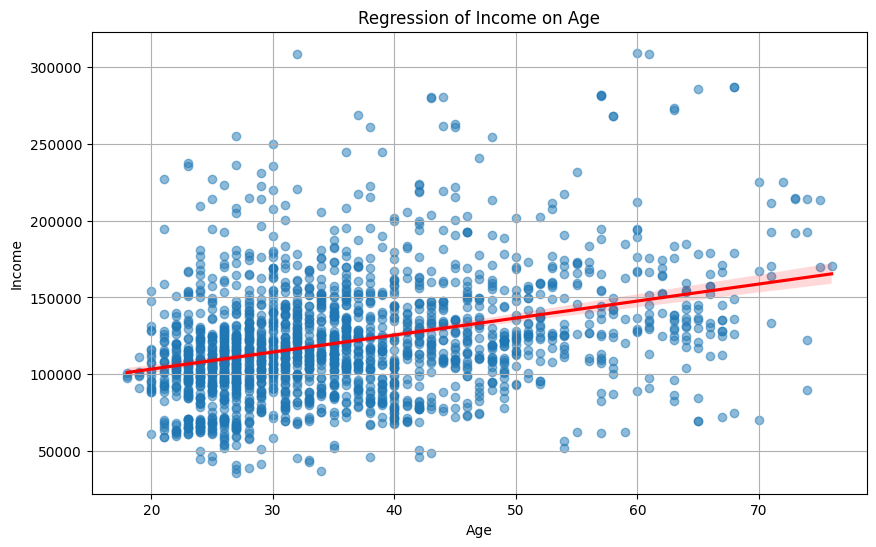

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     262.2
Date:                Wed, 21 May 2025   Prob (F-statistic):           1.64e-55
Time:                        23:02:40   Log-Likelihood:                -23810.
No. Observations:                2000   AIC:                         4.762e+04
Df Residuals:                    1998   BIC:                         4.764e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.118e+04   2583.544     31.423      0.0

In [25]:
# Scatter plot with regression line of Income on Age
plt.figure(figsize=(10, 6)) # Adjust figure size
sns.regplot(x='Age', y='Income', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression of Income on Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True) # Add a grid for better readability
plt.show()

# Linear Regression of Income on Age
X = df['Age']
X = sm.add_constant(X) # Adds a constant term to the predictor
y = df['Income']

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

The above regression and scatter plot show that Age has positive association with income. Specifically, the coefficient estimate of Age is 1,107.59 highly significant (i.e. p-value = 0.000). As reported in descriptive statistics above, the standard deviation of Age is 11.72. Hence, one standard deviation increase in Age leads to $12,981 increase in Income. Thus, the effect of Age on Income is economically significant.